<a href="https://colab.research.google.com/github/QuangHuyLuu/Restaurant-Tips-Analysis/blob/main/140525_%5Btemplate%5D_Restaurant_tips_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍽️ Restaurant Tips Analysis**

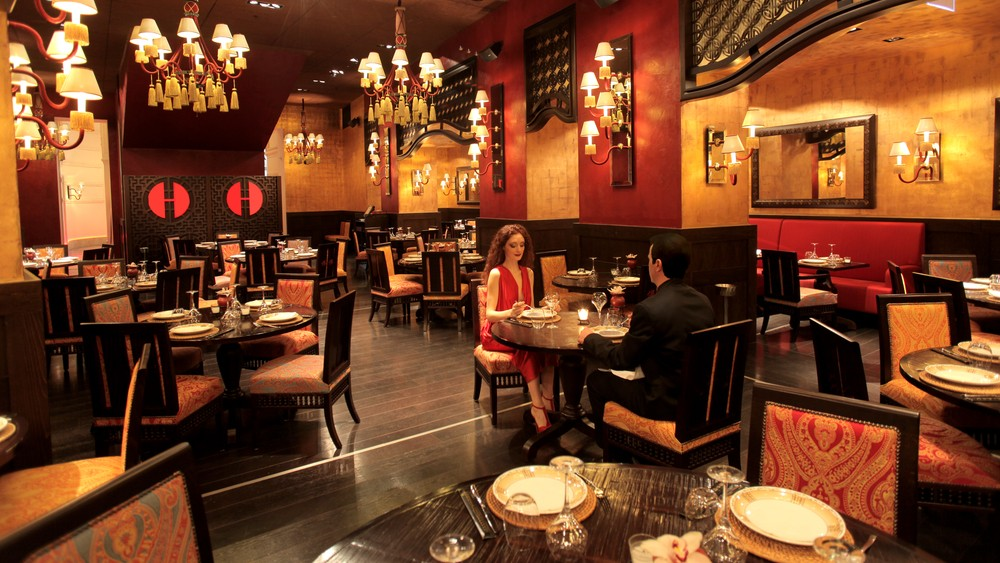

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

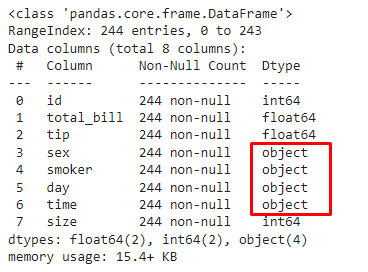

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df=df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
209,209,12.76,2.23,Female,Yes,Sat,Dinner,2
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
200,200,18.71,4.0,Male,Yes,Thur,Lunch,3
201,201,12.74,2.01,Female,Yes,Thur,Lunch,2
179,179,34.63,3.55,Male,Yes,Sun,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
55,55,19.49,3.51,Male,No,Sun,Dinner,2
137,137,14.15,2.0,Female,No,Thur,Lunch,2
66,66,16.45,2.47,Female,No,Sat,Dinner,2
71,71,17.07,3.0,Female,No,Sat,Dinner,3
158,158,13.39,2.61,Female,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min =df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_tip_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_tip_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_tip_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_tip_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Based on max Tips: Smokers give more tips than Non_smokers
2. Based on median: Smokers give more tips than Common and Non_smokers

**General conclusion:** Smokers will give more tips than Common and Non_smokers

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

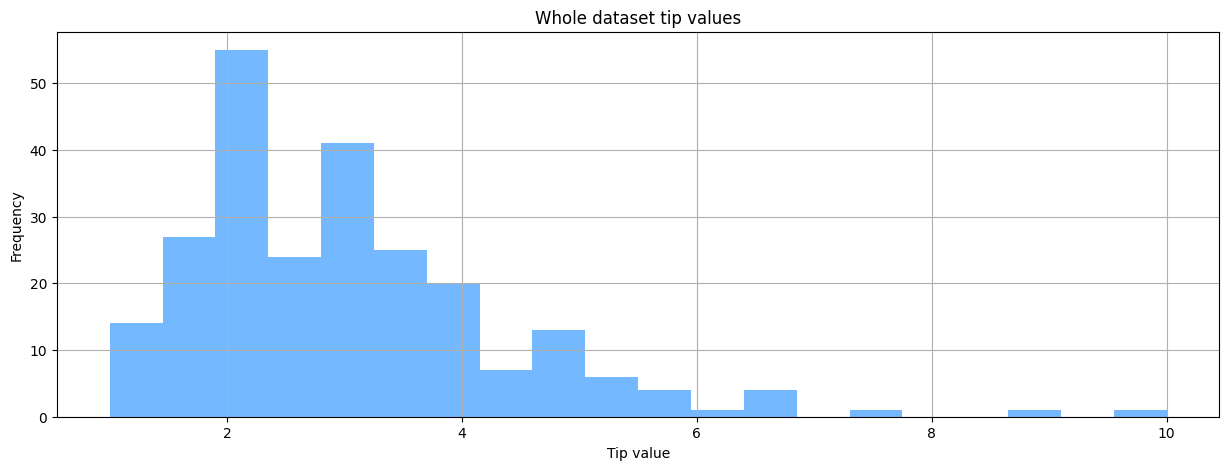

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], bins=20, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

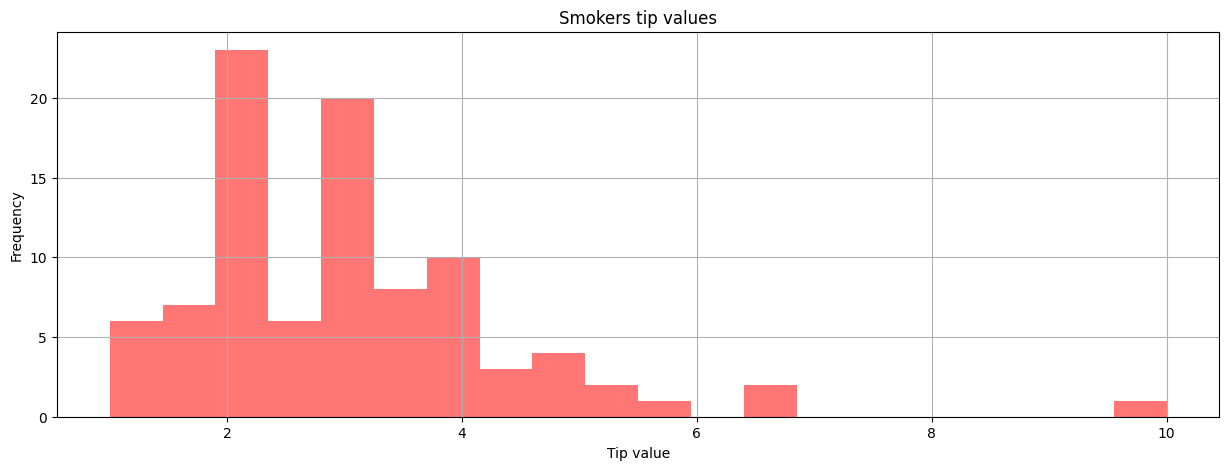

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins=20, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

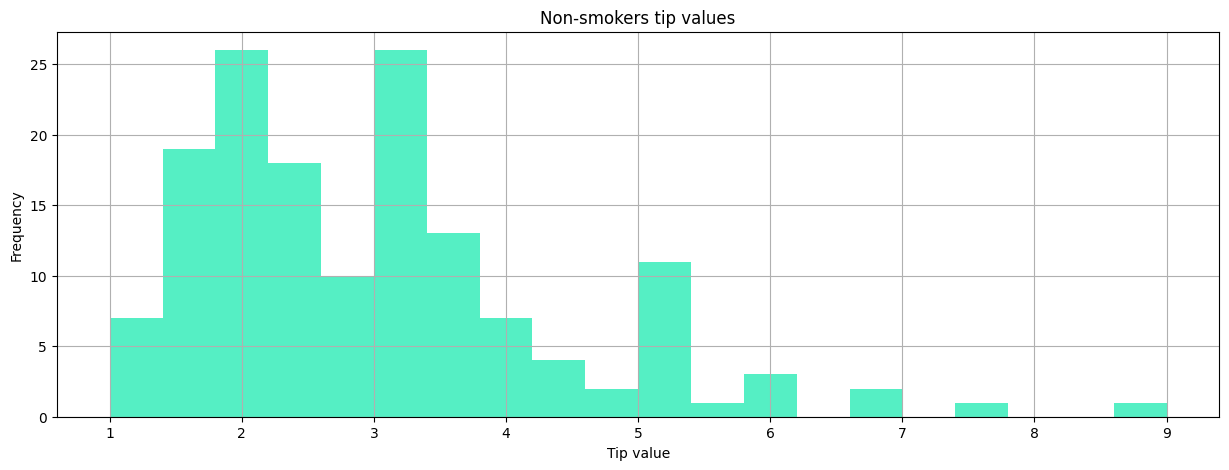

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins=20, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

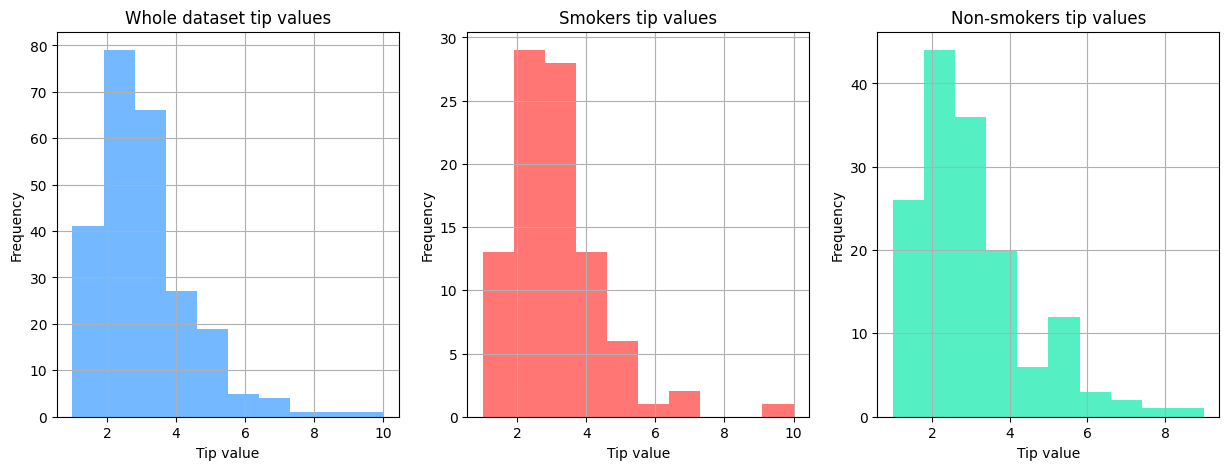

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['tip'], bins=10, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(smokers_df['tip'], bins=10, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(non_smokers_df['tip'], bins=10, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

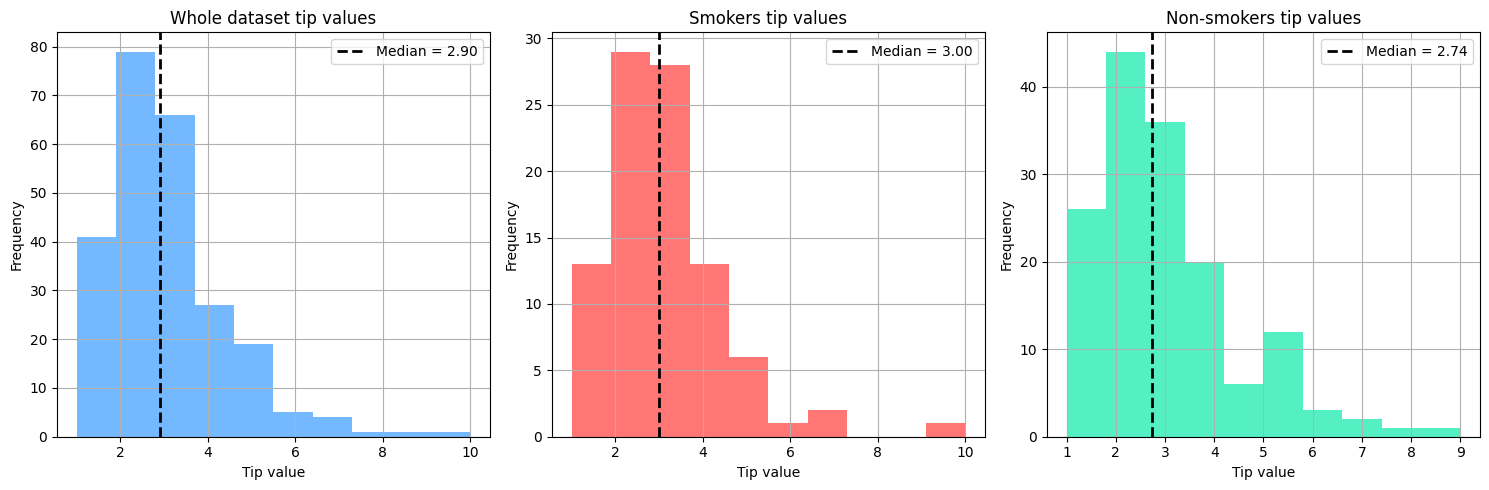

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot 1 – Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], bins=10, color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_all:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend()

# Subplot 2 – Smokers
plt.subplot(1, 3, 2)
plt.hist(smokers_df['tip'], bins=10, color='#ff7675')
median_smokers = smokers_df['tip'].median()
plt.axvline(median_smokers, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_smokers:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.legend()

# Subplot 3 – Non-smokers
plt.subplot(1, 3, 3)
plt.hist(non_smokers_df['tip'], bins=10, color='#55efc4')
median_non_smokers = non_smokers_df['tip'].median()
plt.axvline(median_non_smokers, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_non_smokers:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

1. Insight 1

**General conclusion:**

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
males_df = df[df['sex'] == 'Male']

In [ ]:
males_df.head()

,id,total_bill,tip,sex,smoker,day,time,size
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.0,Male,No,Sun,Dinner,2


In [ ]:
females_df = df[df['sex'] == 'Female']

In [ ]:
males_tip_min = males_df['tip'].min()
males_tip_max = males_df['tip'].max()
males_tip_mean = males_df['tip'].mean()
males_tip_median = males_df['tip'].median()

In [ ]:
# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_tip_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
males_tip_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [ ]:
females_tip_min = females_df['tip'].min()
females_tip_max = females_df['tip'].max()
females_tip_mean = females_df['tip'].mean()
females_tip_median = females_df['tip'].median()

In [ ]:
# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_tip_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
females_tip_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
all_vals_dict1 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe
all_mct1 = pd.DataFrame(all_vals_dict1)
# Output the dataframe
all_mct1

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


1. Based on max Tips: Males give more tips than Females
2. Based on median: Males give more tips than Common and Females

**General conclusion:** Males will give more tips than Common and Females


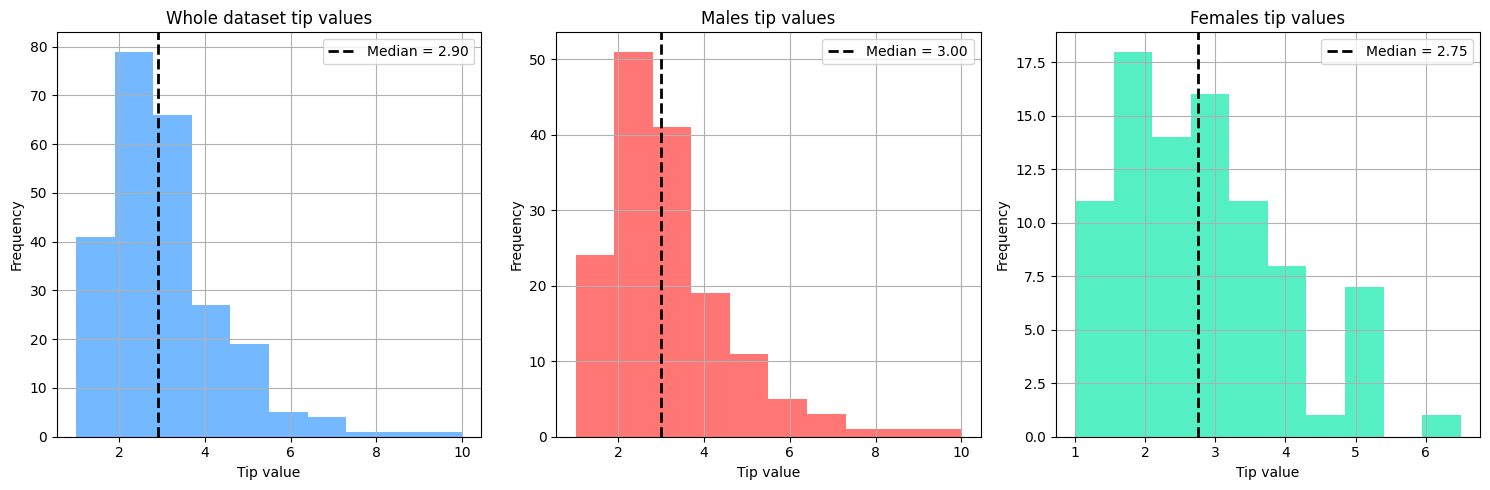

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot 1 – Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], bins=10, color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_all:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend()

# Subplot 2 – Smokers
plt.subplot(1, 3, 2)
plt.hist(males_df['tip'], bins=10, color='#ff7675')
median_males = males_df['tip'].median()
plt.axvline(median_males, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_males:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
plt.grid(True)
plt.legend()

# Subplot 3 – Non-smokers
plt.subplot(1, 3, 3)
plt.hist(females_df['tip'], bins=10, color='#55efc4')
median_females = females_df['tip'].median()
plt.axvline(median_females, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_females:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

1. Insight: Males give more tips than Females based on Histogram

In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(males_df['tip'], females_df['tip'], alternative='greater')
print(f"Mann–Whitney U test: U = {u_stat:.2f}, p = {p_value:.4f}")

Mann–Whitney U test: U = 7289.50, p = 0.1917


Conclusion:

P-value > 0.05, This means we don't have enough evidence to conclude that Males give more tips than Females


### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [ ]:
weekends_df = df.query('day == "Sat" or day == "Sun"')

In [ ]:
weekends_df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

In [ ]:
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)

# Make a dataframe from the list
weekends_tip_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_tip_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
non_weekend_df = df.query('day != "Sat" and day != "Sun"')

In [ ]:
non_weekend_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
119,119,24.08,2.92,Female,No,Thur,Lunch,4
126,126,8.52,1.48,Male,No,Thur,Lunch,2
197,197,43.11,5.0,Female,Yes,Thur,Lunch,4
90,90,28.97,3.0,Male,Yes,Fri,Dinner,2
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [ ]:
non_weekends_tip_min = non_weekend_df['tip'].min()
non_weekends_tip_max = non_weekend_df['tip'].max()
non_weekends_tip_mean = non_weekend_df['tip'].mean()
non_weekends_tip_median = non_weekend_df['tip'].median()

In [ ]:
non_weekends_values = [non_weekends_tip_min, non_weekends_tip_max, non_weekends_tip_mean, non_weekends_tip_median]
# Round all the values to 4 decimal places
non_weekends_values = map(lambda x: round(x, 4), non_weekends_values)

# Make a dataframe from the list
non_weekends_tip_mct = pd.DataFrame(non_weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_weekends_tip_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


Let's show the retrieved results together

In [ ]:
all_vals_dict2 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'Non-Weekends': {'min': non_weekends_tip_min, 'max': non_weekends_tip_max, 'mean': non_weekends_tip_mean, 'median': non_weekends_tip_median}
}

# Make a dataframe
all_mct2 = pd.DataFrame(all_vals_dict2)
# Output the dataframe
all_mct2

,Common,Weekends,Non-Weekends
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

1. Based on max Tips: Weekends give more tips than Non_Weekends
2. Based on median: Weekends give more tips than Common and Non_Weekends
**General conclusion: Weekends will give more tips than Common and Non_Weekends**

#### **Look at histograms**

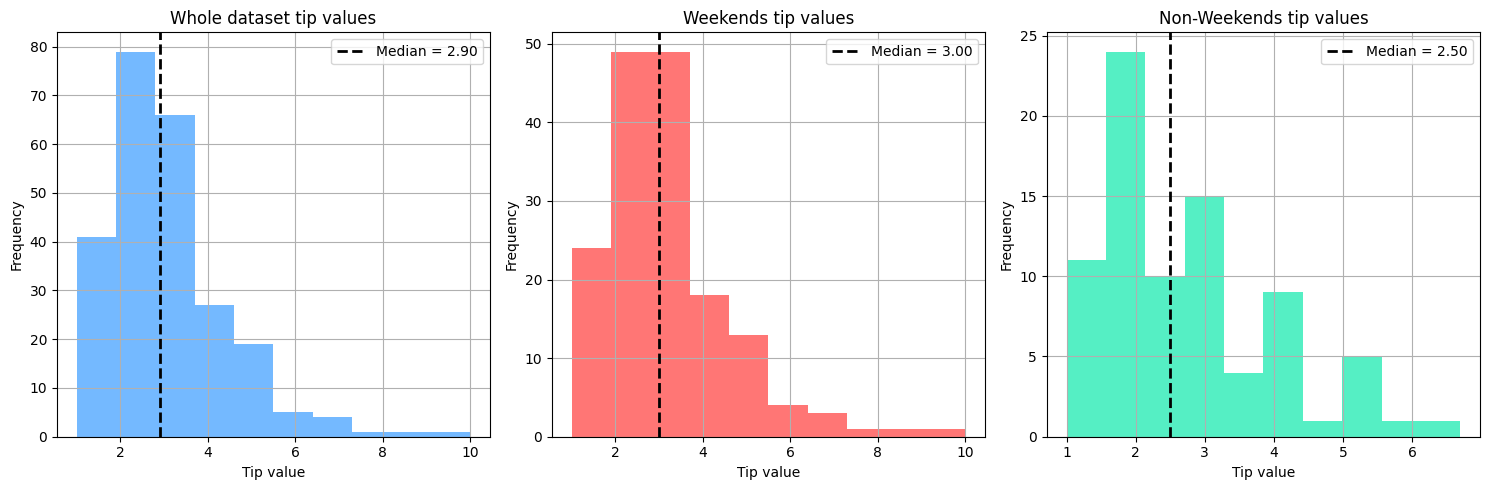

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot 1 – Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], bins=10, color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_all:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend()

# Subplot 2 – Weekends
plt.subplot(1, 3, 2)
plt.hist(weekends_df['tip'], bins=10, color='#ff7675')
median_weekends = weekends_df['tip'].median()
plt.axvline(median_weekends, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_weekends:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekends tip values')
plt.grid(True)
plt.legend()

# Subplot 3 – Non-Weekends
plt.subplot(1, 3, 3)
plt.hist(non_weekend_df['tip'], bins=10, color='#55efc4')
median_non_weekends = non_weekend_df['tip'].median()
plt.axvline(median_non_weekends, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_non_weekends:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-Weekends tip values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Insight: Weekends give more tips than Non-Weekends based on Histogram

**Mann–Whitney U test**

In [ ]:
u_stat, p_value = mannwhitneyu(weekends_df['tip'], non_weekend_df['tip'], alternative='greater')
print(f"Mann–Whitney U test: U = {u_stat:.2f}, p = {p_value:.4f}")

Mann–Whitney U test: U = 7619.50, p = 0.0248


Conclusion:
p-value < 0.05, We conclude that Weekday will receive more tips than Non-Weekends

### **🕑 Do dinners bring more tips?**

In [ ]:
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
dinner_df = df.query('time == "Dinner"')

In [ ]:
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

In [ ]:
non_dinner_df = df.query('time != "Dinner"')

In [ ]:
non_dinner_tip_min = non_dinner_df['tip'].min()
non_dinner_tip_max = non_dinner_df['tip'].max()
non_dinner_tip_mean = non_dinner_df['tip'].mean()
non_dinner_tip_median = non_dinner_df['tip'].median()

In [ ]:
all_vals_dict3 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Non-Dinner': {'min': non_dinner_tip_min, 'max': non_dinner_tip_max, 'mean': non_dinner_tip_mean, 'median': non_dinner_tip_median}
}

# Make a dataframe
all_mct3 = pd.DataFrame(all_vals_dict3)
# Output the dataframe
all_mct3

,Common,Dinner,Non-Dinner
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

1. Based on max Tips: Dinner give more tips than Non_Dinner
2. Based on median: Dinner give more tips than Common and Non_Dinner
**General conclusion: Dinner will give more tips than Common and Non_Dinner**

#### **Look at histograms**

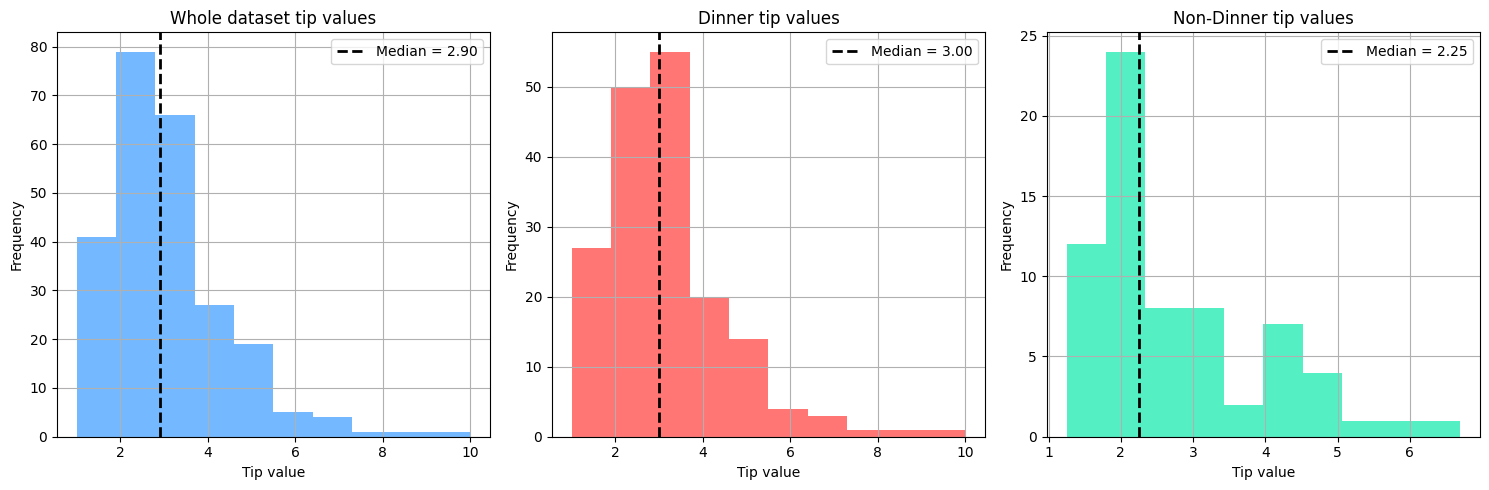

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot 1 – Whole dataset
plt.subplot(1, 3, 1)
plt.hist(df['tip'], bins=10, color='#74b9ff')
median_all = df['tip'].median()
plt.axvline(median_all, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_all:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.legend()

# Subplot 2 – Weekends
plt.subplot(1, 3, 2)
plt.hist(dinner_df['tip'], bins=10, color='#ff7675')
median_dinner = dinner_df['tip'].median()
plt.axvline(median_dinner, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_dinner:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner tip values')
plt.grid(True)
plt.legend()

# Subplot 3 – Non-Weekends
plt.subplot(1, 3, 3)
plt.hist(non_dinner_df['tip'], bins=10, color='#55efc4')
median_non_dinner = non_dinner_df['tip'].median()
plt.axvline(median_non_dinner, color='black', linestyle='dashed', linewidth=2,
            label=f'Median = {median_non_dinner:.2f}')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-Dinner tip values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Insight: Dinner give more tips than Non-Dinner based on Histogram

***Mann–Whitney U test***

In [ ]:
u_stat, p_value = mannwhitneyu(dinner_df['tip'], non_dinner_df['tip'], alternative='greater')
print(f"Mann–Whitney U test: U = {u_stat:.2f}, p = {p_value:.4f}")

Mann–Whitney U test: U = 7063.00, p = 0.0144


Conclusion:
p-value < 0.05, We conclude that Dinner will receive more tips than Non-Dinner